In [2]:
import seaborn as sns
import pandas as pd
from ads_surkas.preprocessing import load_data, clean_data

In [3]:
# load data
# data = pd.read_csv("./.data/pakistan_ecommerce.csv", low_memory=False)
# data.loc[1048570]
data = clean_data(load_data("./.data/pakistan_ecommerce.csv"))
# data["Year"] = data["Year"].astype("int32")

# data["Month"] = data["Month"].astype("int32")
# print(data.dtypes)
#data["Time"] = pd.to_datetime(data["Year"]+data["Month"]+"1",format='%Y-%m-%d')
# data[(data["Year"] != 2016.0) & (data["Year"] != 2017.0) & (data["Year"] != 2018.0)]["Year"]
data["Time"]


/home/ulrik2204/code/school/ads_surkas/ads_surkas/preprocessing/preprocess.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year"] = data["Year"].astype("int32")
/home/ulrik2204/code/school/ads_surkas/ads_surkas/preprocessing/preprocess.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Month"].astype("int32")
/home/ulrik2204/code/school/ads_surkas/ads_surkas/preprocessing/preprocess.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0        2016-07-01
1        2016-07-01
2        2016-07-01
3        2016-07-01
4        2016-07-01
            ...    
584519   2018-08-01
584520   2018-08-01
584521   2018-08-01
584522   2018-08-01
584523   2018-08-01
Name: Time, Length: 584524, dtype: datetime64[ns]

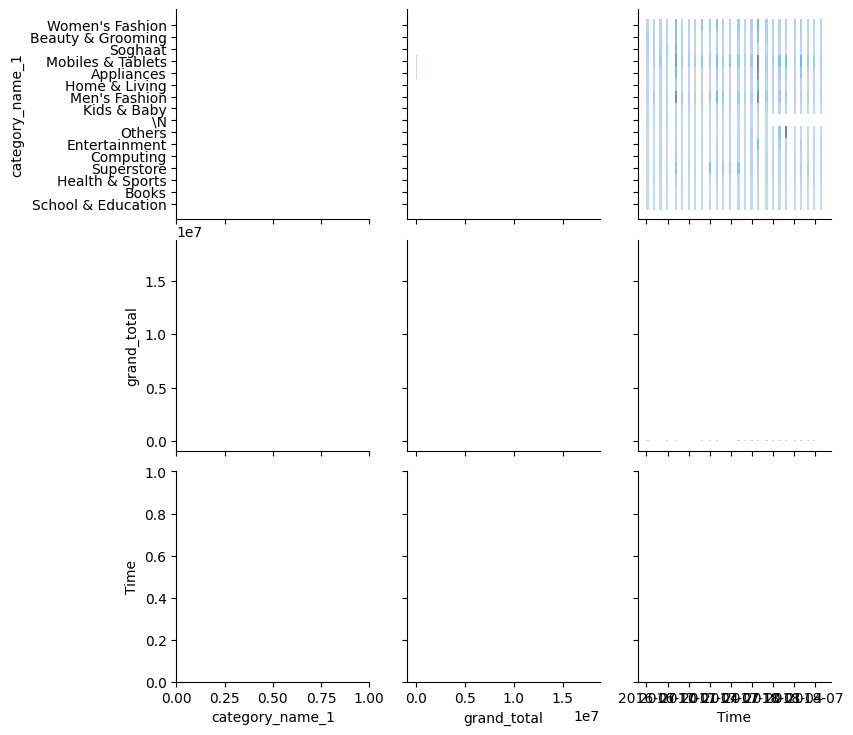

In [7]:
g = sns.PairGrid(data, vars=['category_name_1', 'grand_total', 'Time'])
g.map_upper(sns.histplot)